In [10]:
import numpy as np
import tifffile
import matplotlib.pyplot as plt

# Load the original z-stack to compare with MIP

Z-stack shape: (23, 1800, 1800, 4)
MIP shape: (1800, 1800, 4)


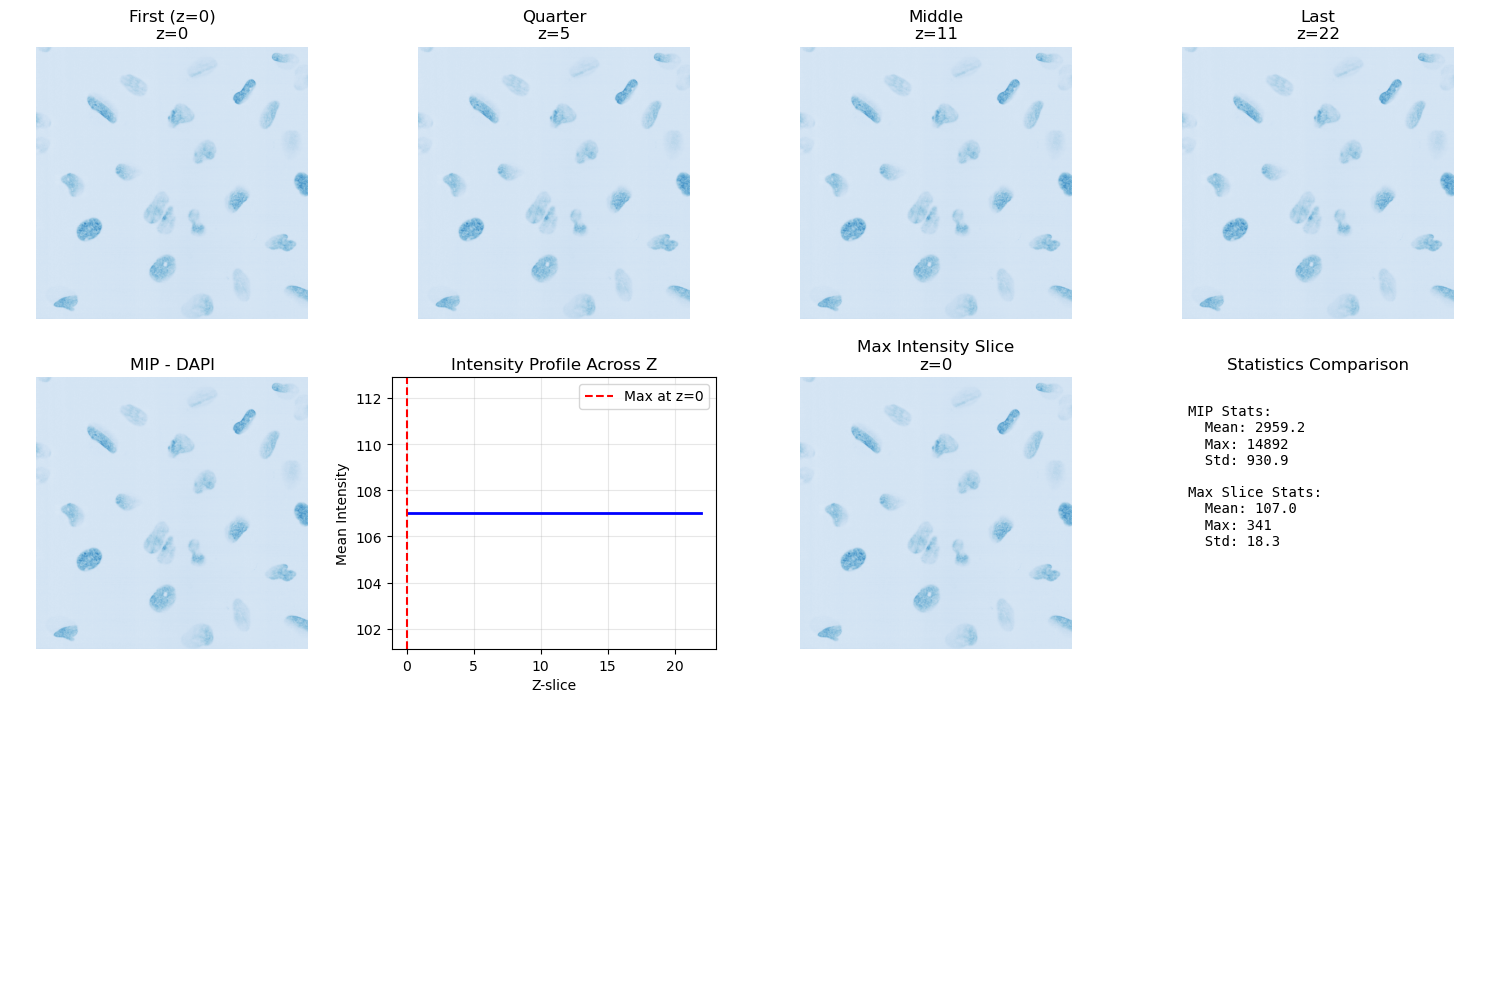


Diagnostics:
Max intensity Z-slice: 0 (out of 23 slices)
MIP max should be >= max slice max: 14892 >= 341 = True


In [11]:
# Load the original z-stack to compare with MIP
zstack = tifffile.imread("data/ALIX/nd2/anti_ALIX_15_min_1.ome.tiff")
mip = tifffile.imread("data/ALIX/nd2/anti_ALIX_15_min_1_mip.tiff")

print(f"Z-stack shape: {zstack.shape}")
print(f"MIP shape: {mip.shape}")

# Look at different z-slices for comparison
fig, axes = plt.subplots(3, 4, figsize=(15, 10))

z_slices_to_check = [0, zstack.shape[0] // 4, zstack.shape[0] // 2, zstack.shape[0] - 1]
slice_labels = ['First (z=0)', 'Quarter', 'Middle', 'Last']

# Check DAPI channel (channel 3) across z-slices
for i, (z_slice, label) in enumerate(zip(z_slices_to_check, slice_labels)):
    ax = axes[0, i]
    ax.imshow(zstack[z_slice, :, :, 3], cmap='Blues')  # DAPI channel
    ax.set_title(f'{label}\nz={z_slice}')
    ax.axis('off')

# Compare with MIP
axes[1, 0].imshow(mip[:, :, 3], cmap='Blues')
axes[1, 0].set_title('MIP - DAPI')
axes[1, 0].axis('off')

# Check intensity statistics across z-slices
z_intensities = [zstack[z, :, :, 3].mean() for z in range(zstack.shape[0])]

axes[1, 1].plot(z_intensities, 'b-', linewidth=2)
axes[1, 1].set_xlabel('Z-slice')
axes[1, 1].set_ylabel('Mean Intensity')
axes[1, 1].set_title('Intensity Profile Across Z')
axes[1, 1].grid(True, alpha=0.3)

# Mark the max intensity z-slice
max_z = np.argmax(z_intensities)
axes[1, 1].axvline(max_z, color='red', linestyle='--', label=f'Max at z={max_z}')
axes[1, 1].legend()

# Show the max intensity slice
axes[1, 2].imshow(zstack[max_z, :, :, 3], cmap='Blues')
axes[1, 2].set_title(f'Max Intensity Slice\nz={max_z}')
axes[1, 2].axis('off')

# Compare MIP vs max slice statistics
mip_stats = {
    'mean': mip[:, :, 3].mean(),
    'max': mip[:, :, 3].max(),
    'std': mip[:, :, 3].std()
}

max_slice_stats = {
    'mean': zstack[max_z, :, :, 3].mean(),
    'max': zstack[max_z, :, :, 3].max(),
    'std': zstack[max_z, :, :, 3].std()
}

stats_text = (
    f"MIP Stats:\n  Mean: {mip_stats['mean']:.1f}\n  Max: {mip_stats['max']}\n  Std: {mip_stats['std']:.1f}\n\n"
    f"Max Slice Stats:\n  Mean: {max_slice_stats['mean']:.1f}\n  Max: {max_slice_stats['max']}\n  Std: {max_slice_stats['std']:.1f}"
)

axes[1, 3].text(0.1, 0.9, stats_text, transform=axes[1, 3].transAxes,
                fontfamily='monospace', fontsize=10, verticalalignment='top')
axes[1, 3].axis('off')
axes[1, 3].set_title('Statistics Comparison')

# Hide unused subplots
for i in range(2, 3):
    for j in range(4):
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

print("\nDiagnostics:")
print(f"Max intensity Z-slice: {max_z} (out of {zstack.shape[0]} slices)")
print(f"MIP max should be >= max slice max: {mip_stats['max']} >= {max_slice_stats['max']} = {mip_stats['max'] >= max_slice_stats['max']}")